In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def show(img):
    if img.ndim == 2:
        plt.imshow(img, cmap='gray')
    else:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.show()

## 1. 直方图比较

0.9704102328321987 -0.258911058215225


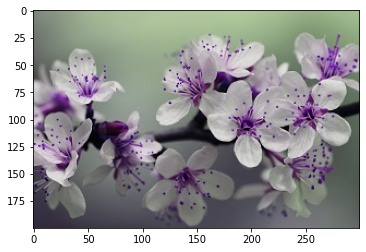

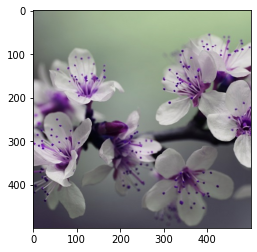

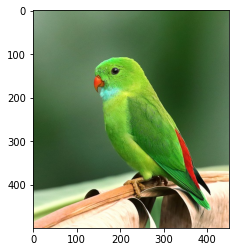

In [9]:
img1 = cv.imread('pic/petal200x300.jpg')
img2 = cv.imread('pic/petal500x500.jpg')
img3 = cv.imread('pic/parrot500x450.jpg')

imgs = [img1, img2, img3]
hists = [cv.calcHist([img], [0], None, [64], [0, 256]) for img in imgs]
hists = [(hist / img.size * 3).astype(np.float32) for (hist, img) in zip(hists, imgs)]

corr01 = cv.compareHist(hists[0], hists[1], cv.HISTCMP_CORREL)
corr02 = cv.compareHist(hists[0], hists[2], cv.HISTCMP_CORREL)

print(corr01, corr02)

# -1 1
for img in imgs:
    show(img)

## 2. 直方图均衡化

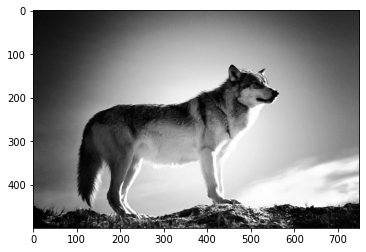

In [43]:
img = cv.imread('pic/wolf500x750.jpg', 0)
equ1 = cv.equalizeHist(img)

show(equ1)

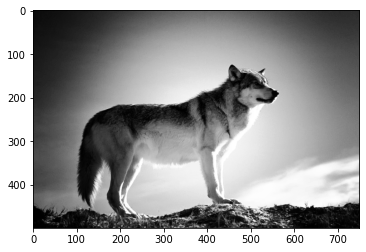

In [55]:
img = cv.imread('pic/wolf500x750.jpg', 0)
L = 256

h = cv.calcHist([img], [0], None, [256], [0, 256])
f = h / img.size
a = np.cumsum(f)
s = np.round(a * (L - 1)).astype(np.uint8)
equ2 = s[img]

show(equ2)

## 3. 反向投影——灰度图

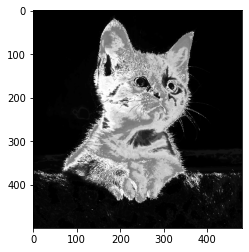

In [24]:
whole = cv.imread('pic/cat500x480.jpg', 0)
part  = whole[100:250, 150:350]
hist  = cv.calcHist([part], [0], None, [64], [0, 256])
hist2 = cv.normalize(hist, None, 0, 255, cv.NORM_MINMAX)
backp = cv.calcBackProject([whole//4], [0], hist2, [0, 64], 1)

show(backp)

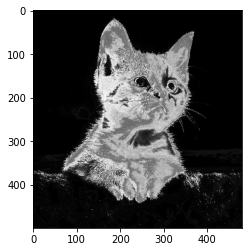

In [26]:
whole = cv.imread('pic/cat500x480.jpg', 0)
part  = whole[100:250, 150:350]
hist  = cv.calcHist([part], [0], None, [256], [0, 256])
hist2 = cv.normalize(hist, None, 0, 255, cv.NORM_MINMAX)

bp    = hist2[whole].astype(np.uint8)

show(bp)

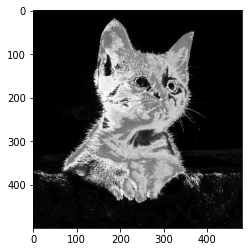

In [27]:
whole = cv.imread('pic/cat500x480.jpg', 0)
part  = whole[100:250, 150:350]
hist  = cv.calcHist([part], [0], None, [128], [0, 256])
hist2 = cv.normalize(hist, None, 0, 255, cv.NORM_MINMAX)

bp1   = hist2[whole // 2].astype(np.uint8)

show(bp1)

## 5. 反向投影——彩色图

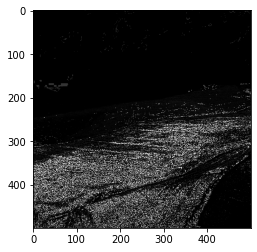

In [38]:
whole = cv.imread('pic/grass500x500.jpg')
whole_hsv = cv.cvtColor(whole, cv.COLOR_BGR2HSV)
part_hsv  = whole_hsv[400:, :100]
part_hist = cv.calcHist([part_hsv], [0,1], None, [180, 256], [0, 180, 0, 256])

back_prj1 = cv.calcBackProject([whole_hsv], [0,1], part_hist, [0, 180, 0, 256], 1)

show(back_prj1)

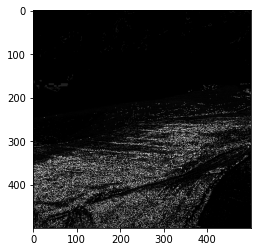

In [39]:
whole = cv.imread('pic/grass500x500.jpg')
whole_hsv = cv.cvtColor(whole, cv.COLOR_BGR2HSV)
part_hsv  = whole_hsv[400:, :100]
part_hist = cv.calcHist([part_hsv], [0,1], None, [180, 256], [0, 180, 0, 256])

back_prj2 = part_hist[whole_hsv[:,:,0], whole_hsv[:,:,1]]

show(back_prj2)